In [24]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,age,gender,name,num_children,num_pets,state
0,23,M,john,2,5,california
1,78,F,mary,0,1,dc
2,22,M,peter,0,0,california
3,19,M,jeff,3,5,dc
4,45,M,bill,2,2,california
5,33,F,lisa,1,2,texas
6,20,M,jose,4,3,texas


   age gender   name  num_children  num_pets       state
0   23      M   john             2         5  california
1   78      F   mary             0         1          dc
2   22      M  peter             0         0  california
3   19      M   jeff             3         5          dc
4   45      M   bill             2         2  california
5   33      F   lisa             1         2       texas
6   20      M   jose             4         3       texas


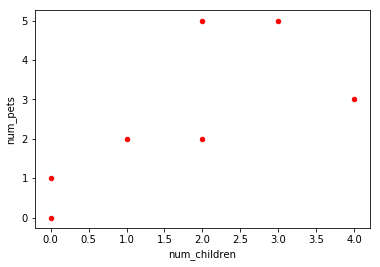

In [8]:
import matplotlib.pyplot as plt


# a scatter plot comparing num_children and num_pets
print(df)
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

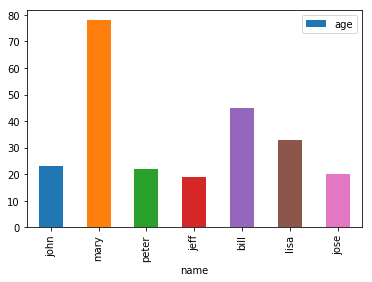

In [9]:
df.plot(kind='bar',x='name',y='age')

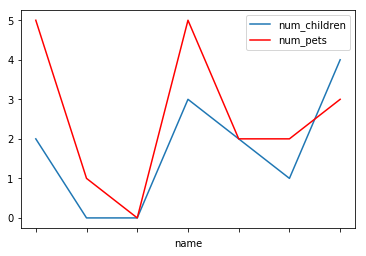

In [10]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


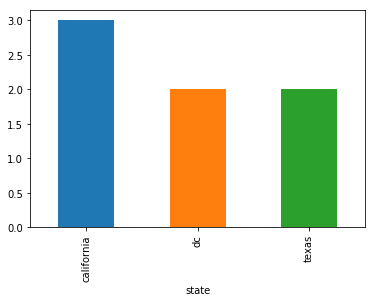

In [11]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

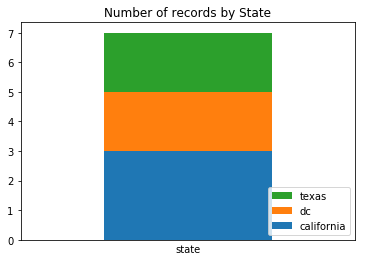

In [14]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

NameError: name 'mtick' is not defined

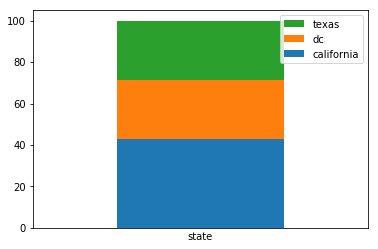

In [18]:
#normalized to percent
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['state'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


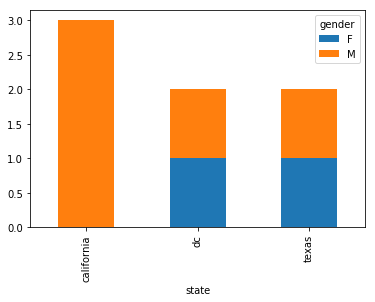

In [19]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

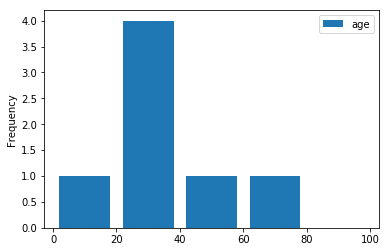

In [20]:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [22]:
df2 = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

df2

,date_of_birth,name
0,01/21/1988,john
1,03/10/1977,lisa
2,07/25/1999,peter
3,01/22/1977,carl
4,09/30/1968,linda
5,09/15/1970,betty


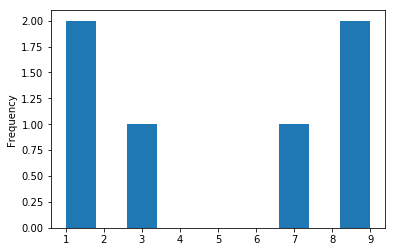

In [25]:
df2['date_of_birth'] = pd.to_datetime(df2['date_of_birth'],infer_datetime_format=True)

plt.clf()
df2['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.show()

   age gender   name  num_children  num_pets       state
0   23      M   john             2         5  california
1   78      F   mary             0         1          dc
2   22      M  peter             0         0  california
3   19      M   jeff             3         5          dc
4   45      M   bill             2         2  california
5   33      F   lisa             1         2       texas
6   20      M   jose             4         3       texas


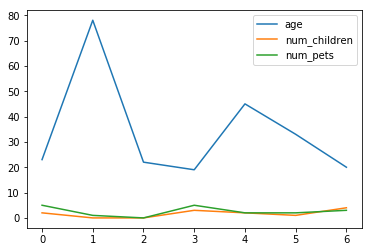

In [27]:
df.plot()
print(df)

In [31]:
df.groupby("state")['num_children'].mean()

state
california    1.333333
dc            1.500000
texas         2.500000
Name: num_children, dtype: float64

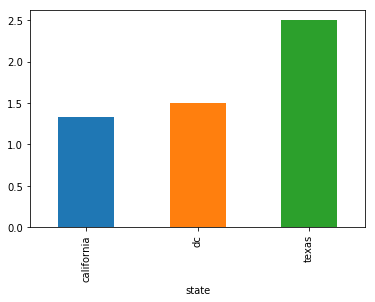

In [32]:
df.groupby("state")['num_children'].mean().plot(kind='bar')

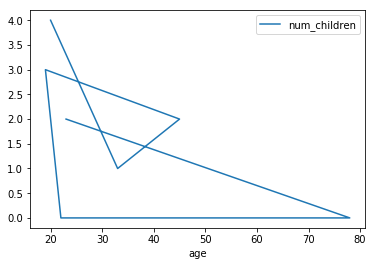

In [34]:
####dont do it this way#####
df.plot(x='age', y='num_children')

state
california    AxesSubplot(0.125,0.125;0.775x0.755)
dc            AxesSubplot(0.125,0.125;0.775x0.755)
texas         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

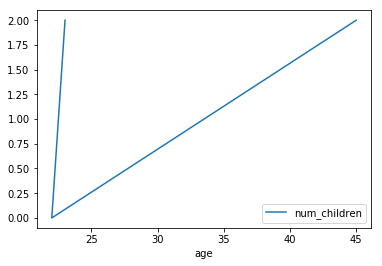

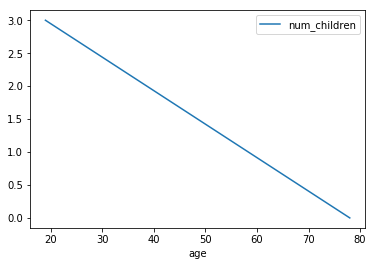

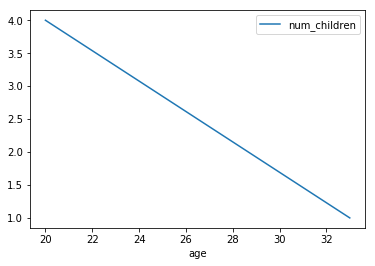

In [41]:
#this method is the correct one but not enough info
df.groupby('state').plot(x='age', y='num_children')

state
california    AxesSubplot(0.125,0.125;0.775x0.755)
dc            AxesSubplot(0.125,0.125;0.775x0.755)
texas         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

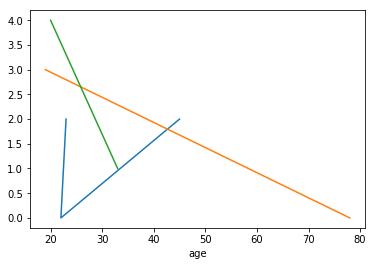

In [44]:
#Best method over lap
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.groupby('state').plot(x='age', y='num_children', ax=ax, legend=False)

#### Overall, you just need to know if you have a meaningful index.
#### Did you do a groupby or value_counts()? You can use .plot()
#### Do you have a normal dataframe? You should probably set x and y.